In [1]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)
pip 20.2.4 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [3]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [4]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=(None, 5))
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [5]:
# layer.variables
# x * w + b
layer.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 0.02719174, -0.01928368,  0.04987185,  0.12432446,  0.163648  ,
          0.17825444,  0.0766273 , -0.14948672, -0.09815107, -0.18293384,
          0.189492  , -0.19046198, -0.02438176,  0.00065862, -0.03288607,
         -0.20381474,  0.0809025 ,  0.05971031, -0.06390099,  0.20126392,
          0.10442515, -0.08025752, -0.12754291, -0.03322466, -0.14739892,
         -0.06203733, -0.10888165,  0.17118715, -0.2190864 ,  0.14295648,
          0.128172  ,  0.03769387, -0.23745328,  0.10251434, -0.12241895,
          0.20820023, -0.07966068, -0.10952659,  0.2107587 , -0.1660225 ,
         -0.16035801, -0.21440768,  0.21816264, -0.07816896, -0.04375541,
         -0.17587474, -0.0789514 ,  0.23085158,  0.20169647,  0.18418579,
          0.16097234, -0.16012937,  0.1181931 ,  0.02235536, -0.0581129 ,
          0.19694372, -0.03965946, -0.17071494, -0.21489257,  0.1371452 ,
          0.05803488,  0.22430952,  0.0701

In [6]:
help(layer)

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
 |  (the

In [7]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [8]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [17]:
# tf.nn.softplus: log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customized_softplus([-10., -5., 0., 5., 10.]))

tf.Tensor([4.5398901e-05 6.7153485e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [18]:
# customized dense layer.
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super().__init__(**kwargs)
    
    def build(self, input_shape):
        '''构建所需要的参数'''
        # x * w + b. input_shape:[None, a] w:[a, b] output_shape: [None, b]
        self.kernel = self.add_weight(name = 'kernel', 
                                      shape=(input_shape[1], self.units),
                                     initializer = 'uniform',
                                     trainable = True)
        self.bias = self.add_weight(name = 'bias',
                                   shape = (self.units, ),
                                   initializer = 'zeros',
                                   trainable = True)
        super().build(input_shape)
    
    def call(self, x):
        '''完成正向计算'''
        return self.activation(x @ self.kernel + self.bias)

model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',
                      input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus,
    # keras.layers.Dense(1, activation='softplus')
    # keras.layers.Dense(1), keras.layers.Activation('softplus')
])
model.summary()
model.compile(loss='mean_squared_error', optimizer='sgd')
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_2 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_3 (Cu (None, 1)                 31        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(x_train_scaled, y_train,
                   validation_data=(x_valid_scaled, y_valid),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.2000 - val_loss: 0.6810
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5951 - val_loss: 0.5907
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5210 - val_loss: 0.5258
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4767 - val_loss: 0.4928
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4546 - val_loss: 0.4774
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4422 - val_loss: 0.4691
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4304 - val_loss: 0.4480
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4205 - val_loss: 0.4365
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4140 - val_loss: 0.4442
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4066 - val_lo

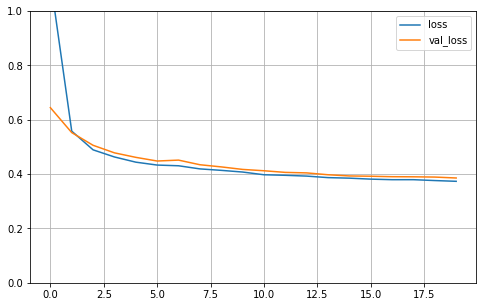

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [15]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 713us/step - loss: 0.3904


0.39035630226135254